# Example Notebook

## Load up modules and source code

In [1]:
import os, sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
sys.path.append('../')
from src.generate_data import generate_data_from_signal, generate_grouped_data, generate_series, sample_prior

## Generate Observations

In [3]:
signal = sample_prior(num_coef=30)
data = generate_grouped_data(signal, sig=0.1)

In [4]:
list_of_obs = [Y for X,Y in [generate_series(data[i]) for i in range(len(data))]]

In [5]:
def list_of_arrary_to_df(list_of_array, 
                         type_col='Simulated', 
                         list_index = 'index',
                         inter_list_index='observation'):
    
    all_obs = pd.DataFrame.from_records(list_of_array)
    stacked_obs = all_obs.reset_index().set_index('index').stack().reset_index()

    stacked_obs.columns = [inter_list_index, list_index, 'value']

    stacked_obs['type'] = type_col
    
    return stacked_obs

In [6]:
stacked_obs = list_of_arrary_to_df(list_of_obs, list_index='time_index')

In [7]:
signal_df = pd.DataFrame({'value': generate_series(signal)[1], 'time_index' : [i for i in np.arange(len(signal))]})
signal_df['type'] = 'True'

In [8]:
plot_df = pd.concat([stacked_obs[['time_index','value', 'type']], signal_df], sort=True)

C:\Users\james\AppData\Local\Programs\Python\Python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


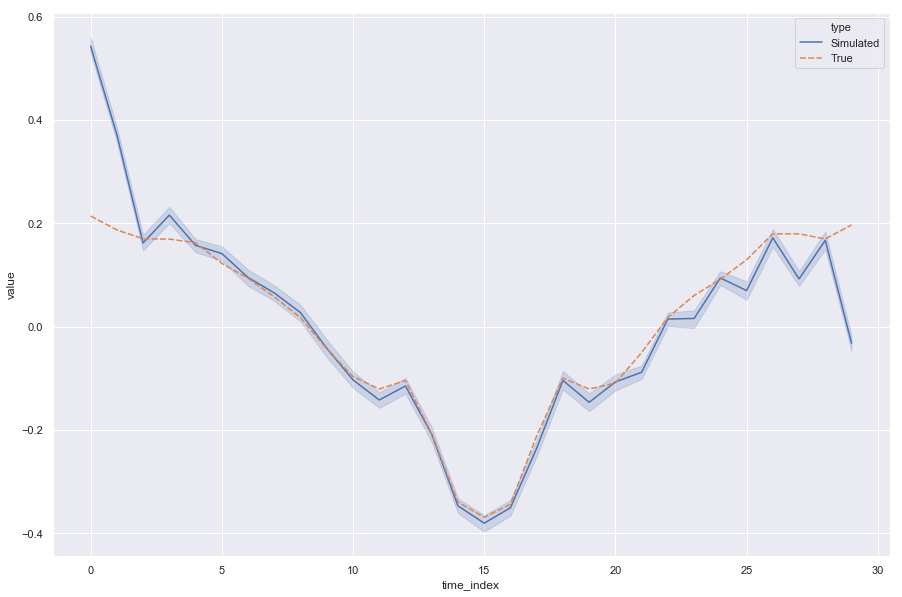

In [9]:
a4_dims = (15, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plot_df = pd.concat([stacked_obs[['time_index','value', 'type']], signal_df], sort=True)
# Plot the responses for different events and regions
sns.lineplot(x="time_index", y='value', hue='type', data=plot_df, ax=ax, style='type')